# Часть 1. Решающие деревья

In [ ]:
# Не забудьте подключить Housing Price Competition!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', sep=',')

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
#print(iris.DESCR)

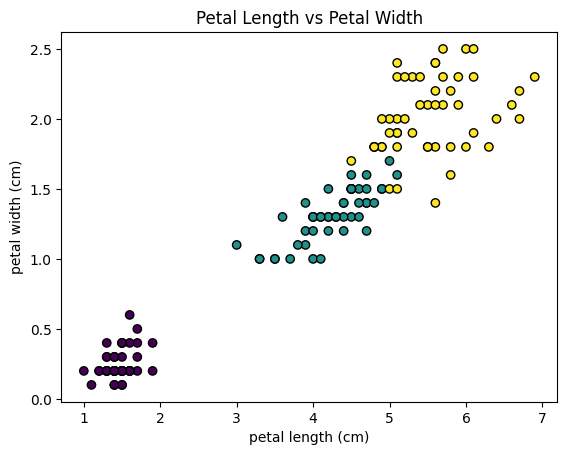

In [ ]:
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, cmap='viridis', edgecolor="black")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Petal Length vs Petal Width')
plt.show()

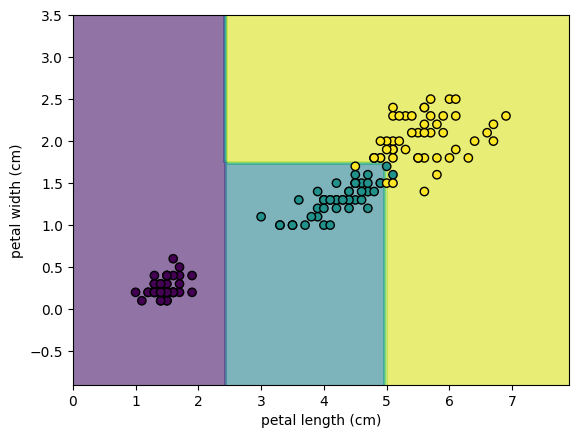

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[:, 2:4]

tree = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X, iris.target)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    tree,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap=plt.cm.viridis
)

disp.ax_.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, edgecolor="black")

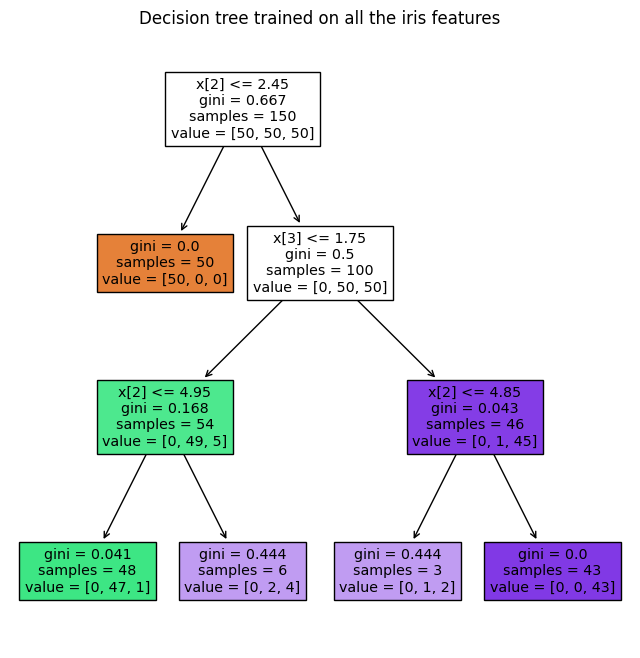

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
tree = DecisionTreeClassifier(max_depth=3, random_state=42).fit(iris.data, iris.target)
plot_tree(tree, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

Основная идея - сегментация пространства признаков на области с применением набора правил, который можно представить в виде дерева.

Особенности:
* Можно применять как для регрессии, так и для классификации
* Легко интерпретируются, не требуют знаний о предметной области
---
* Автоматически обрабатывают пропуски
* Работают с категориальными признаками
* Нет необходимости в нормализации
* Не чуствителен к выбросам
___
* Склонны к переобучению
* Велика доля случайности - при повторных построениях возможен разный результат

Регуляризация:
* ограничение на макс. глубину
* ограничение на количество рассматриваемых признаков в каждом узле (случайный выбор нескольких)
* ограничение на количество примеров в конечном узле
* ограничение на количество примеров в разделяемом узле
* стрижка дерева (pruning). При таком подходе дерево сначала строится до максимальной глубины, потом постепенно, снизу вверх, некоторые вершины дерева убираются за счет сравнения по качеству дерева с данным разбиением и без него

## Оценка классификации

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.5, random_state = 0)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.96

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



## Регрессия

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
categories = df.select_dtypes(include=['object']).columns
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for category in categories:
    df[category] = LabelEncoder().fit_transform(df[category])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [ ]:
X = df.drop(columns='SalePrice')

In [ ]:
X.isnull().sum().sort_values(ascending=False)[:4]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BedroomAbvGr      0
dtype: int64

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [ ]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = DecisionTreeRegressor(criterion='squared_error', random_state=0) #42
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  41417.73588817645


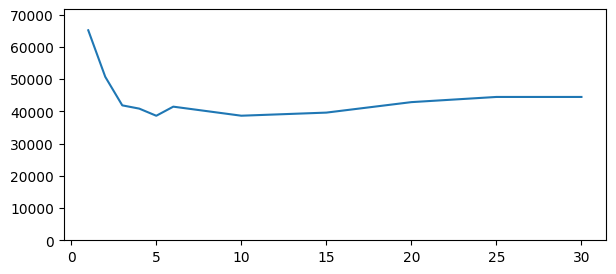

In [ ]:
y = [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, 30]
x = []
for depth in y:
    dt = DecisionTreeRegressor(max_depth=depth, criterion='squared_error', random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    x.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(7,3))
plt.ylim(0,max(x)*1.1)
plt.plot(y,x)
plt.show()

In [ ]:
dt = DecisionTreeRegressor(max_depth=2, criterion='squared_error', random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

set(y_pred)

{142077.6432506887, 206157.82558139536, 275040.27407407406, 376657.0612244898}

# K-кратная перекрестная проверка

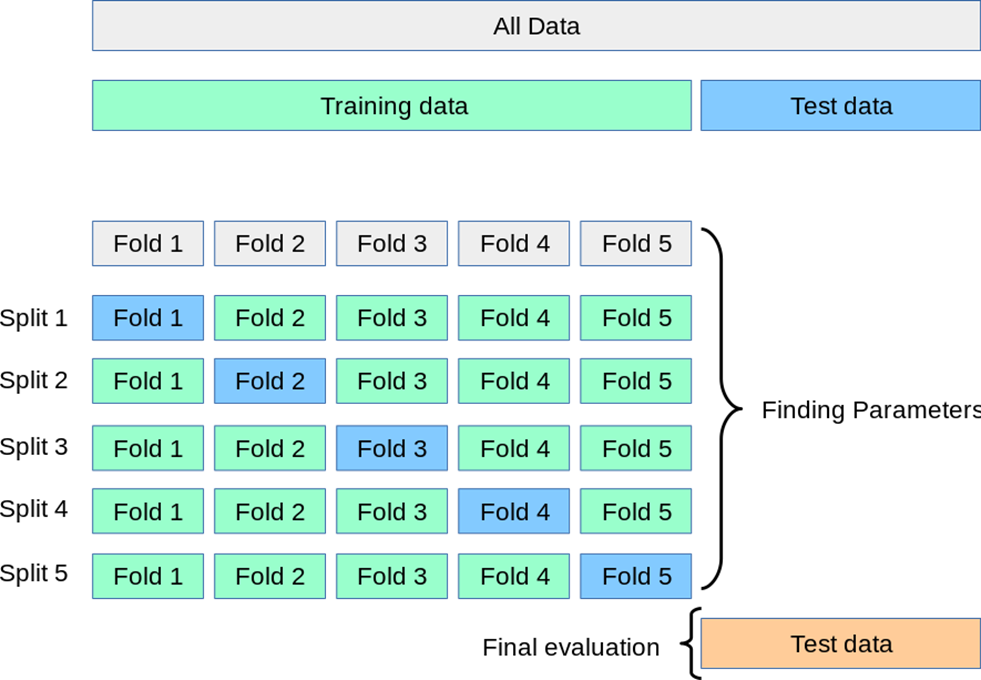

In [ ]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(max_depth=4, criterion='squared_error', random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_root_mean_squared_error')
scores

array([-40481.34823222, -46159.84420961, -35252.98680832, -36410.06589027,
       -53059.98674084])

In [ ]:
np.mean(scores)

-42272.846376252586

In [ ]:
print('score = %0.3f ± %0.3f' % (np.mean(scores), np.std(scores)))

score = -42272.846 ± 6608.044


# Часть 2. Ансамбли моделей

### Основная идея:

* строятся базовые модели, отличающиеся друг от друга
* агрегация прогнозов в ансамбль с применением мета-алгоритма

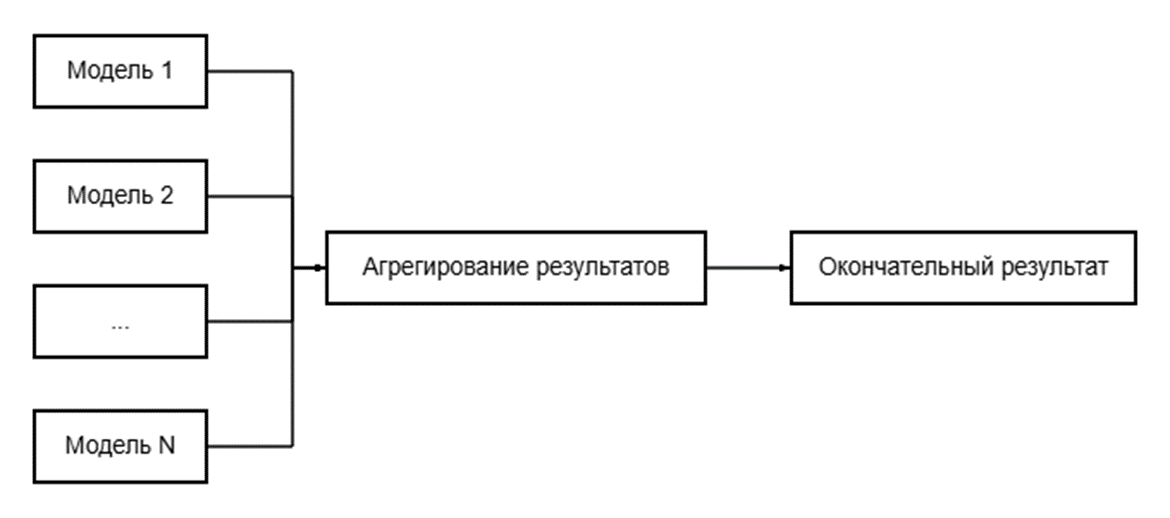

## RandomForest

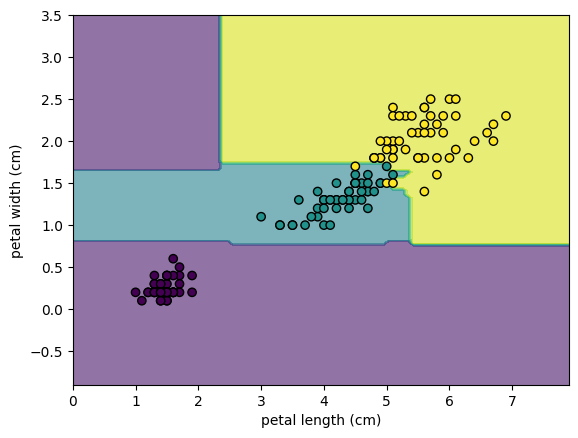

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#позволяет визуализировать границы принятия решений обученной модели с указанной цветовой картой

X = iris.data[:, 2:4]

rf = RandomForestClassifier(n_estimators=50, max_depth=4).fit(X, iris.target)

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    rf,
    X,
    response_method="predict",
    alpha=0.6,
    ax=ax,
    xlabel=iris.feature_names[2],
    ylabel=iris.feature_names[3],
    cmap='viridis'
)

disp.ax_.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, edgecolor="black")

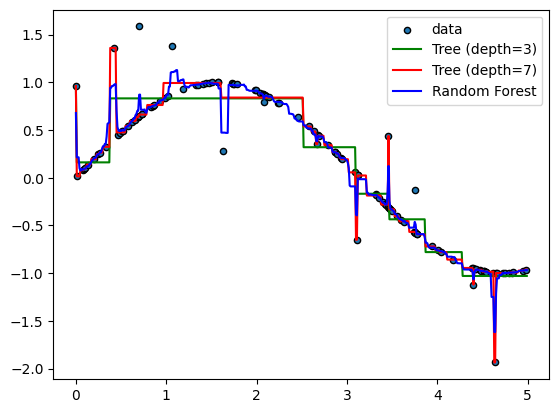

In [ ]:
rng = np.random.RandomState(1)

X = np.sort(5* rng.rand(120,1), axis = 0)
y = np.sin(X).ravel()
y[::10] += 2 * (0.5- rng.rand(12))

tree1 = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X, y)
tree2 = DecisionTreeRegressor(max_depth=7, random_state=42).fit(X, y)
rf = RandomForestRegressor(random_state=42).fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

plt.scatter(X, y, s=20, edgecolor="black", label="data")
plt.plot(X_test, tree1.predict(X_test), color="green", label="Tree (depth=3)")
plt.plot(X_test, tree2.predict(X_test), color="red", label="Tree (depth=7)")
plt.plot(X_test, rf.predict(X_test), color="blue", label="Random Forest")

plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.preprocessing import LabelEncoder

categories = df.select_dtypes(include=['object']).columns

for category in categories:
    df[category] = LabelEncoder().fit_transform(df[category])

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [ ]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  35541.48250373248


In [ ]:
from xgboost import XGBRegressor, XGBClassifier

xgb = XGBRegressor(n_estimators=100,
                   max_depth=8,
                   learning_rate=0.5)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  30012.812622064812


In [ ]:
from lightgbm import LGBMClassifier, LGBMRegressor

light = LGBMRegressor(boosting_type="gbdt",
                       learning_rate=0.05,
                       n_estimators=1000,
                       max_depth=-1,
                       verbose=-1
                       )
light.fit(X_train, y_train)

y_pred = light.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  29514.5467543341


In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

cat = CatBoostRegressor(iterations=1000,
                        learning_rate=0.1,
                        depth=6,
                        logging_level='Silent')
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  26471.343384516647


## Feature Importance

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(cat.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances.head(20)

,feature,importance
17,OverallQual,24.009
46,GrLivArea,13.478
61,GarageCars,4.826
34,BsmtFinSF1,4.782
4,LotArea,4.448
38,TotalBsmtSF,4.116
49,FullBath,3.764
43,1stFlrSF,3.208
56,Fireplaces,2.295
19,YearBuilt,2.215


In [ ]:
importances.feature.values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtFinSF1', 'LotArea',
       'TotalBsmtSF', 'FullBath', '1stFlrSF', 'Fireplaces', 'YearBuilt',
       '2ndFlrSF', 'GarageFinish', 'BsmtQual', 'GarageArea',
       'OverallCond', 'ExterQual', 'OpenPorchSF', 'YearRemodAdd',
       'Neighborhood', 'SaleCondition', 'Id', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'BsmtFinType1', 'GarageType',
       'LandContour', 'WoodDeckSF', 'KitchenQual', 'BsmtFullBath',
       'BedroomAbvGr', 'MoSold', 'MasVnrArea', 'KitchenAbvGr',
       'BsmtUnfSF', 'BsmtExposure', 'CentralAir', 'YrSold', 'MSSubClass',
       'HouseStyle', 'HalfBath', 'Condition1', 'Functional',
       'Exterior1st', 'LotConfig', 'LotShape', 'TotRmsAbvGrd', 'MSZoning',
       'ScreenPorch', 'BsmtCond', 'MasVnrType', 'BsmtFinSF2', 'Fence',
       'Heating', 'EnclosedPorch', 'BldgType', 'ExterCond', 'RoofMatl',
       'Exterior2nd', 'PoolArea', 'Foundation', 'PavedDrive',
       'GarageCond', '3SsnPorch', 'SaleType', 'Garage

In [ ]:
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', sep=',')

df = df[['OverallQual', 'GrLivArea', 'GarageCars', 'BsmtFinSF1', 'LotArea',
       'TotalBsmtSF', 'FullBath', '1stFlrSF', 'Fireplaces', 'YearBuilt',
       '2ndFlrSF', 'GarageFinish', 'BsmtQual', 'GarageArea',
       'OverallCond', 'ExterQual', 'OpenPorchSF', 'YearRemodAdd',
       'Neighborhood', 'SaleCondition', 'SalePrice']]
df.head()

,OverallQual,GrLivArea,GarageCars,BsmtFinSF1,LotArea,TotalBsmtSF,FullBath,1stFlrSF,Fireplaces,YearBuilt,...,GarageFinish,BsmtQual,GarageArea,OverallCond,ExterQual,OpenPorchSF,YearRemodAdd,Neighborhood,SaleCondition,SalePrice
0,7,1710,2,706,8450,856,2,856,0,2003,...,RFn,Gd,548,5,Gd,61,2003,CollgCr,Normal,208500
1,6,1262,2,978,9600,1262,2,1262,1,1976,...,RFn,Gd,460,8,TA,0,1976,Veenker,Normal,181500
2,7,1786,2,486,11250,920,2,920,1,2001,...,RFn,Gd,608,5,Gd,42,2002,CollgCr,Normal,223500
3,7,1717,3,216,9550,756,1,961,1,1915,...,Unf,TA,642,5,TA,35,1970,Crawfor,Abnorml,140000
4,8,2198,3,655,14260,1145,2,1145,1,2000,...,RFn,Gd,836,5,Gd,84,2000,NoRidge,Normal,250000


In [ ]:
categories = df.select_dtypes(include=['object']).columns
categories

Index(['GarageFinish', 'BsmtQual', 'ExterQual', 'Neighborhood',
       'SaleCondition'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:4]

GarageFinish     81
BsmtQual         37
OverallQual       0
SaleCondition     0
dtype: int64

In [ ]:
for category in categories:
    print(category, ': ', df[category].unique())

GarageFinish :  ['RFn' 'Unf' 'Fin' nan]
BsmtQual :  ['Gd' 'TA' 'Ex' nan 'Fa']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
SaleCondition :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [ ]:
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode())
df.head()

,OverallQual,GrLivArea,GarageCars,BsmtFinSF1,LotArea,TotalBsmtSF,FullBath,1stFlrSF,Fireplaces,YearBuilt,...,GarageFinish,BsmtQual,GarageArea,OverallCond,ExterQual,OpenPorchSF,YearRemodAdd,Neighborhood,SaleCondition,SalePrice
0,7,1710,2,706,8450,856,2,856,0,2003,...,RFn,Gd,548,5,Gd,61,2003,CollgCr,Normal,208500
1,6,1262,2,978,9600,1262,2,1262,1,1976,...,RFn,Gd,460,8,TA,0,1976,Veenker,Normal,181500
2,7,1786,2,486,11250,920,2,920,1,2001,...,RFn,Gd,608,5,Gd,42,2002,CollgCr,Normal,223500
3,7,1717,3,216,9550,756,1,961,1,1915,...,Unf,TA,642,5,TA,35,1970,Crawfor,Abnorml,140000
4,8,2198,3,655,14260,1145,2,1145,1,2000,...,RFn,Gd,836,5,Gd,84,2000,NoRidge,Normal,250000


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Neighborhood'] = LabelEncoder().fit_transform(df['Neighborhood'])

for category in ['Neighborhood', 'SaleCondition']:
    df[category] = LabelEncoder().fit_transform(df[category])

df = pd.get_dummies(df, columns = ['GarageFinish', 'BsmtQual', 'ExterQual'], prefix = None, prefix_sep = '_', drop_first = True)
df.head()

,OverallQual,GrLivArea,GarageCars,BsmtFinSF1,LotArea,TotalBsmtSF,FullBath,1stFlrSF,Fireplaces,YearBuilt,...,SaleCondition,SalePrice,GarageFinish_RFn,GarageFinish_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,1710,2,706,8450,856,2,856,0,2003,...,4,208500,True,False,False,True,False,False,True,False
1,6,1262,2,978,9600,1262,2,1262,1,1976,...,4,181500,True,False,False,True,False,False,False,True
2,7,1786,2,486,11250,920,2,920,1,2001,...,4,223500,True,False,False,True,False,False,True,False
3,7,1717,3,216,9550,756,1,961,1,1915,...,0,140000,False,True,False,False,True,False,False,True
4,8,2198,3,655,14260,1145,2,1145,1,2000,...,4,250000,True,False,False,True,False,False,True,False


In [ ]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=1000,
                        learning_rate=0.1,
                        depth=6,
                        logging_level='Silent')
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  25410.04786623189


In [ ]:
from lightgbm import plot_importance

light = LGBMRegressor(boosting_type="gbdt",
                       learning_rate=0.05,
                       n_estimators=1000,
                       max_depth=-1,
                       verbose=-1
                       )
light.fit(X_train, y_train)

y_pred = light.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  26987.665703546434


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

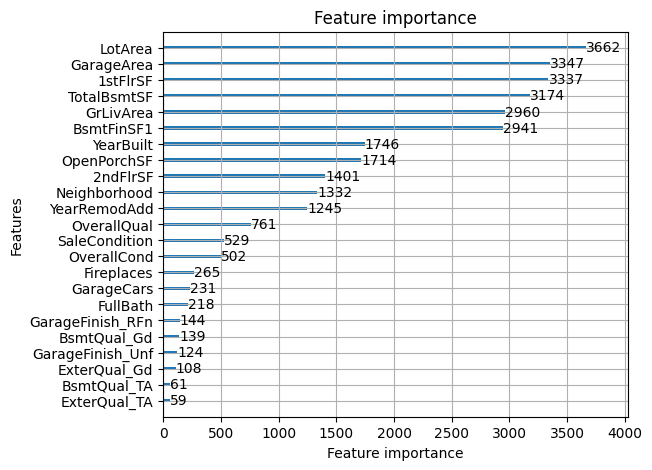

In [ ]:
plot_importance(light, figsize=(6,5))

## Gridsearch

In [ ]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

X_1, X_val, y_1, y_val = train_test_split(X, y, test_size = 0.1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  27899.74515983641


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=1000,
                        learning_rate=0.1,
                        depth=6,
                        logging_level='Silent')
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  25410.04786623189


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
print('max_depth:', best.get_params()['max_depth'])
print('n_estimators:', best.get_params()['n_estimators'])

y_pred = best.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
max_depth: 10
n_estimators: 50
RMSE =  28133.940067815765


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 4, 7, 10, 12],
    'learning_rate': [0.05, 0.1, 0.5],
    'verbose': ['-1']
}

light = LGBMRegressor()
grid_search = RandomizedSearchCV(light, param_distributions=parameters, n_iter=10, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
print(best.get_params())

y_pred = best.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': '-1'}
RMSE =  28178.864566002136


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=1000,
                        learning_rate=0.1,
                        depth=6,
                        logging_level='Silent')
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  25410.04786623189


## Stacking/Blending

* Мета-алгоритм, обучаемый на результатах базовых моделей
* Сильно зависит от качества моделей
* Мета-алгоритм легко переобучается

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)),
    ('cat', CatBoostRegressor(n_estimators=1000, max_depth=6, learning_rate=0.1, logging_level='Silent')),
    ('light', LGBMRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, verbose=-1)),
]
blend = StackingRegressor(
    estimators=estimators, final_estimator = LinearRegression()
)

blend.fit(X_test, y_test)
y_pred = blend.predict(X_val)
print('Stacking RMSE = ', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Stacking RMSE =  29690.183642169843
